In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# <h1> Importing & Pre-Processing Dataset </h1> #

In [28]:
df = pd.read_csv('https://raw.githubusercontent.com/JeftaAdriel/Softskill-DS/main/TugasIndividu1/US%20Police%20shootings%20in%20from%202015-22.csv')

In [29]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7729 entries, 0 to 7728
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7729 non-null   int64  
 1   name                     7312 non-null   object 
 2   date                     7729 non-null   object 
 3   manner_of_death          7729 non-null   object 
 4   armed                    7520 non-null   object 
 5   age                      7247 non-null   float64
 6   gender                   7709 non-null   object 
 7   race                     6269 non-null   object 
 8   city                     7729 non-null   object 
 9   state                    7729 non-null   object 
 10  signs_of_mental_illness  7729 non-null   bool   
 11  threat_level             7729 non-null   object 
 12  flee                     6854 non-null   object 
 13  body_camera              7729 non-null   bool   
 14  longitude               

## <h1> Checking Duplicates </h1> ##

In [ ]:
df[df.duplicated(keep=False)]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact


## <h1> Drop Column </h1> ##

In [ ]:
drop_col = ['id', 'name', 'city', 'longitude', 'latitude', 'is_geocoding_exact']
df.drop(drop_col, axis=1, inplace=True)

In [ ]:
df.head()

,date,manner_of_death,armed,age,gender,race,state,signs_of_mental_illness,threat_level,flee,body_camera
0,2015-01-02,shot,gun,53.0,M,A,WA,True,attack,Not fleeing,False
1,2015-01-02,shot,gun,47.0,M,W,OR,False,attack,Not fleeing,False
2,2015-01-03,shot and Tasered,unarmed,23.0,M,H,KS,False,other,Not fleeing,False
3,2015-01-04,shot,toy weapon,32.0,M,W,CA,True,attack,Not fleeing,False
4,2015-01-04,shot,nail gun,39.0,M,H,CO,False,attack,Not fleeing,False


## <h1> Changing `date` to Datetime Format </h1> ##

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7729 entries, 0 to 7728
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     7729 non-null   datetime64[ns]
 1   manner_of_death          7729 non-null   object        
 2   armed                    7520 non-null   object        
 3   age                      7247 non-null   float64       
 4   gender                   7709 non-null   object        
 5   race                     6269 non-null   object        
 6   state                    7729 non-null   object        
 7   signs_of_mental_illness  7729 non-null   bool          
 8   threat_level             7729 non-null   object        
 9   flee                     6854 non-null   object        
 10  body_camera              7729 non-null   bool          
dtypes: bool(2), datetime64[ns](1), float64(1), object(7)
memory usage: 558.7+ KB


## <h1> Checking Missing Values </h1> ##

In [ ]:
df.isna().sum()

date                          0
manner_of_death               0
armed                       209
age                         482
gender                       20
race                       1460
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        875
body_camera                   0
dtype: int64

In [ ]:
df.dropna(subset = ['race'], inplace = True)

In [ ]:
df.isna().sum()

date                         0
manner_of_death              0
armed                      199
age                        124
gender                       2
race                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       504
body_camera                  0
dtype: int64

### <h1> Filling `Age` Missing Values

<Axes: xlabel='age', ylabel='Count'>

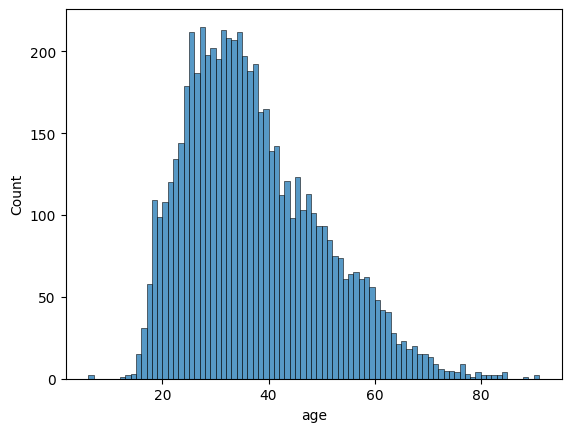

In [ ]:
sns.histplot(df['age'], binwidth=1)

In [ ]:
df['age'].fillna(df['age'].median(), inplace=True)

In [ ]:
df.isna().sum()

date                         0
manner_of_death              0
armed                      199
age                          0
gender                       2
race                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       504
body_camera                  0
dtype: int64

In [ ]:
df.dropna(subset = ['armed', 'flee', 'gender'], inplace = True)

In [ ]:
df.isna().sum()

date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
dtype: int64

## <h1> Checking Categorical Variables Unique Values </h1> ##

In [ ]:
cat = ['armed', 'gender', 'race', 'state', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera']
def uniques(df, cat):
  for i in cat:
    print(f'Nilai-Nilai Unik Variabel {i}')
    print(df[i].unique())
    print("")

In [ ]:
uniques(df, cat)

Nilai-Nilai Unik Variabel armed
['gun' 'unarmed' 'toy weapon' 'nail gun' 'knife' 'shovel' 'vehicle'
 'hammer' 'hatchet' 'sword' 'machete' 'box cutter' 'undetermined'
 'metal object' 'screwdriver' 'lawn mower blade' 'flagpole'
 'guns and explosives' 'cordless drill' 'BB gun' 'metal pole' 'Taser'
 'metal pipe' 'metal hand tool' 'blunt object' 'metal stick'
 'sharp object' 'meat cleaver' 'carjack' 'chain' "contractor's level"
 'railroad spikes' 'stapler' 'beer bottle' 'crossbow' 'unknown weapon'
 'binoculars' 'pellet gun' 'bean-bag gun'
 'baseball bat and fireplace poker' 'straight edge razor' 'gun and knife'
 'ax' 'brick' 'baseball bat' 'hand torch' 'chain saw' 'garden tool'
 'pair of scissors' 'pole' 'pick-axe' 'flashlight' 'spear' 'chair'
 'pitchfork' 'hatchet and gun' 'rock' 'piece of wood' 'pipe' 'glass shard'
 'motorcycle' 'pepper spray' 'metal rake' 'baton' 'crowbar' 'oar'
 'machete and gun' 'air conditioner' 'pole and knife'
 'baseball bat and bottle' 'fireworks' 'pen' 'chainsaw' 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5574 entries, 0 to 7726
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     5574 non-null   datetime64[ns]
 1   manner_of_death          5574 non-null   object        
 2   armed                    5574 non-null   object        
 3   age                      5574 non-null   float64       
 4   gender                   5574 non-null   object        
 5   race                     5574 non-null   object        
 6   state                    5574 non-null   object        
 7   signs_of_mental_illness  5574 non-null   bool          
 8   threat_level             5574 non-null   object        
 9   flee                     5574 non-null   object        
 10  body_camera              5574 non-null   bool          
dtypes: bool(2), datetime64[ns](1), float64(1), object(7)
memory usage: 446.4+ KB


## <h1> Changing Value for `body_camera` & `signs_of_mental_illness`

In [ ]:
replacements = {True: 'Yes', False: 'No'}
df['body_camera'] = df['body_camera'].map(replacements).fillna(df['body_camera'])
df['signs_of_mental_illness'] = df['signs_of_mental_illness'].map(replacements).fillna(df['signs_of_mental_illness'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5574 entries, 0 to 7726
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     5574 non-null   datetime64[ns]
 1   manner_of_death          5574 non-null   object        
 2   armed                    5574 non-null   object        
 3   age                      5574 non-null   float64       
 4   gender                   5574 non-null   object        
 5   race                     5574 non-null   object        
 6   state                    5574 non-null   object        
 7   signs_of_mental_illness  5574 non-null   object        
 8   threat_level             5574 non-null   object        
 9   flee                     5574 non-null   object        
 10  body_camera              5574 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 522.6+ KB


# <h1> Visualization </h1> #

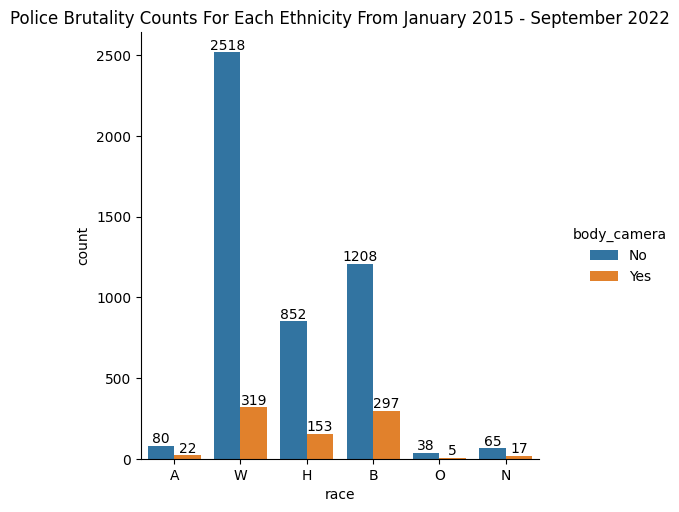

In [ ]:
g = sns.catplot(data=df, x='race', hue='body_camera', kind='count')
g.set(title="Police Brutality Counts For Each Ethnicity From January 2015 - September 2022")
ax = g.facet_axis(0,0)
for c in ax.containers:
    labels = [f'{(v.get_height()):.0f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

A = Asian
W = White
H = Hispanic
B = Black
O = Other
N = Native